学年クラス：3C　学籍番号：b2181930　氏名：西村貴志

***
# 演習1.

教師あり学習は、正解のラベルや数値が分かっているデータをもとに学習し、未知のデータの正解を推論するものである。また、人間が特徴を抽出しやすいデータを大量に用意する必要がある。  
教師なし学習は、正解のラベルがついていないデータから、データそのものが持つ構造・特徴を分析してグループ分けをするものである。そうして分けられたグループの分類や傾向などを知ることができる。  
強化学習は、実際にタスクを繰り返し実行しながら最適な判断を見つけ出すものである。出力に対して報酬を設定し、どのようにすればその報酬が最大限得られるのかを試行錯誤しながら学習する。
***

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import sklearn
%precision 3

'%.3f'

In [2]:
pwd

'C:\\Users\\taka1\\PycharmProjects\\DMn'

In [3]:
cd ./dm4

C:\Users\taka1\PycharmProjects\DMn\dm4


In [4]:
import requests, zipfile
from io import StringIO
import io

In [5]:
sdata_m = pd.read_csv('student-mat.csv', sep=';')

In [6]:
sdata_m.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


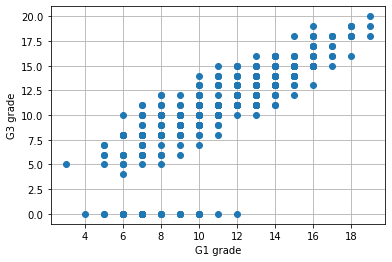

In [7]:
plt.plot(sdata_m['G1'], sdata_m['G3'], 'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [9]:
sdata_m.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


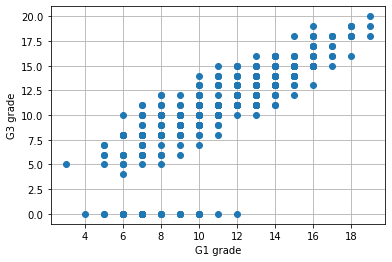

In [10]:
plt.plot(sdata_m['G1'], sdata_m['G3'], 'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [11]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [12]:
X = sdata_m.loc[:,['G1']].values
Y = sdata_m['G3'].values
reg.fit(X, Y)
print('回帰係数 a= ',reg.coef_)
print('切片 b= ',reg.intercept_)

回帰係数 a=  [1.106]
切片 b=  -1.6528038288004616


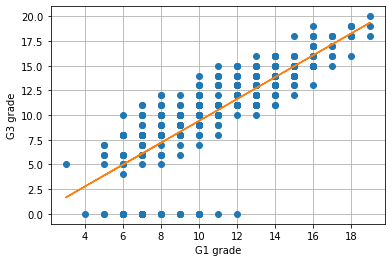

In [13]:
plt.plot(sdata_m['G1'], sdata_m['G3'], 'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.plot(X, reg.predict(X))
plt.grid(True)

In [14]:
print('決定係数：',reg.score(X, Y))

決定係数： 0.64235084605227


In [15]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
auto.columns = ['symboling','normalized-losses','make','fuel-type','aspiration',
                'num-of-doors','body-style','drive-wheels','engine-location',
                'wheel-base','length','width','height','curb-weight','engine-type',
                'num-of-cylinders', 'engine-size','fuel-system','bore','stroke',
                'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
                'price']

In [16]:
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(205, 26)


In [17]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [18]:
auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [19]:
auto = auto.replace('?', np.nan).dropna()
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(199, 4)


In [20]:
print('データ型の確認(変換前)\n{}'.format(auto.dtypes))

データ型の確認(変換前)
price          object
horsepower     object
width         float64
height        float64
dtype: object


In [21]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('データ型の確認(変換後)\n{}'.format(auto.dtypes))

データ型の確認(変換後)
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


***
# 演習2.
説明変数同士の相関が強く、独立でないものがあると、回帰係数の推定を行えず分析が失敗することがある。このようなときに多重共線性があると言う。
***

In [22]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


***
# 演習3.
priceとhoresepowerの相関が最も高い。次点でpriceとwidth。
***

In [23]:
X = auto.drop('price', axis=1)
y = auto['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片:{:.3f}'.format(model.intercept_))

決定係数(train):0.733
決定係数(test):0.737

回帰係数
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片:-128409.046


***
# 演習4.

In [24]:
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
auto.columns = ['symboling','normalized-losses','make','fuel-type','aspiration',
                'num-of-doors','body-style','drive-wheels','engine-location',
                'wheel-base','length','width','height','curb-weight','engine-type',
                'num-of-cylinders', 'engine-size','fuel-system','bore','stroke',
                'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
                'price']
auto = auto[['price','length','engine-size']]
auto.isin(['?']).sum()

price          4
length         0
engine-size    0
dtype: int64

In [25]:
auto = auto.replace('?', np.nan).dropna()
print('自動車データの形式:{}'.format(auto.shape))
print('\nデータ型の確認(変換前)\n{}'.format(auto.dtypes))
auto = auto.assign(price=pd.to_numeric(auto.price))
print('\nデータ型の確認(変換後)\n{}'.format(auto.dtypes))
print('\n説明変数どうしの相関\n{}'.format(auto.corr()))

自動車データの形式:(201, 3)

データ型の確認(変換前)
price           object
length         float64
engine-size      int64
dtype: object

データ型の確認(変換後)
price            int64
length         float64
engine-size      int64
dtype: object

説明変数どうしの相関
                price    length  engine-size
price        1.000000  0.690628     0.872335
length       0.690628  1.000000     0.685025
engine-size  0.872335  0.685025     1.000000


In [26]:
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

res_ser = pd.Series(model.coef_, index=X.columns)
print('\n回帰係数\n{}'.format(res_ser))
print('切片:{:.3f}'.format(model.intercept_))

res_str = '\n※結果※\nprice = '
for index, value in res_ser.iteritems():
  res_str += '('+str(value)+' * '+index+') + '
else:
  res_str += '('+str(model.intercept_)+')'
print(res_str)

決定係数(train):0.771
決定係数(test):0.763

回帰係数
length         179.544547
engine-size    120.273905
dtype: float64
切片:-33590.411

※結果※
price = (179.54454651561608 * length) + (120.27390482674998 * engine-size) + (-33590.41099160761)


***

In [27]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
adult.columns = ['age','workclass','fnlwgt','education','education-num',
                 'marital-status', 'occupation','relationship','race','sex',
                 'capital-gain', 'capital-loss','hours-per-week','native-country',
                 'flg-50K']
print('データの形式:{}'.format(adult.shape))
print('欠損数:{}'.format(adult.isnull().sum().sum()))
adult.head()

データの形式:(32561, 15)
欠損数:0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [29]:
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x== ' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
print('正解率(train):{:,.3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:,.3f}'.format(model.score(X_test,y_test)))

正解率(train):0.797
正解率(test):0.798


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
model = LogisticRegression()
model.fit(X_train_std,y_train)
print('正解率(train):{:,.3f}'.format(model.score(X_train_std,y_train)))
print('正解率(test):{:,.3f}'.format(model.score(X_test_std,y_test)))

正解率(train):0.811
正解率(test):0.810


In [32]:
model.coef_

array([[0.533, 0.025, 0.839, 2.285, 0.287]])

***
# 演習5.

In [33]:
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss',
           'hours-per-week']]
y = adult['fin_flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
print('正解率(train):{:,.3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:,.3f}'.format(model.score(X_test,y_test)))

正解率(train):0.797
正解率(test):0.798


In [34]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
model = LogisticRegression()
model.fit(X_train_std,y_train)
print('正解率(train):{:,.3f}'.format(model.score(X_train_std,y_train)))
print('正解率(test):{:,.3f}'.format(model.score(X_test_std,y_test)))

正解率(train):0.815
正解率(test):0.814


In [35]:
model.coef_

array([[0.58 , 0.037, 0.805, 2.251, 0.277, 0.494]])

***
